# Notebook Roadmap

- **Introduction**
- **Import library**
- **Data Loading**
- **Exploratory Data Analysis (EDA)**
- **Data Preprocessing**
- **Model Training**  
  - LogisticRegression
  - Random Forest Classifier
- **Model Evaluation**
- **Results Visualization** 
- **Conclusion**

## Introduction 

Ce projet vise à prédire la présence d'une maladie cardiaque à l'aide du jeu de données `Heart Failure` (Kaggle). Deux modèles sont comparés : **Régression Logistique** et **Random Forest**.

## Import librairies

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


## Data Loading

In [42]:
df = pd.read_csv('data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploratory Data Analysis (EDA)

In [43]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [44]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


###  Heart disease distribution

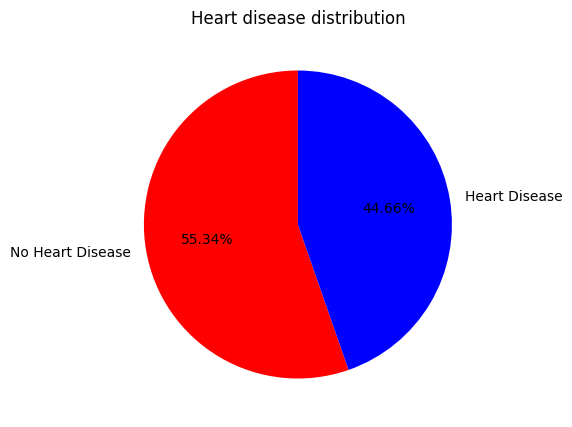

In [45]:
nb_heart_disease = df['HeartDisease'].value_counts()
plt.figure(figsize=(5, 5))
plt.title('Heart disease distribution')
plt.pie(
    nb_heart_disease, 
    labels=['No Heart Disease', 'Heart Disease'], 
    autopct='%1.2f%%', 
    colors=['red','blue'],
    startangle=90, )
plt.show()

### Categorical data encoding 

In [46]:
label = LabelEncoder()
categ_col = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']
for col in categ_col :
    df[col] = label.fit_transform(df[col])

### Correlation Matrix

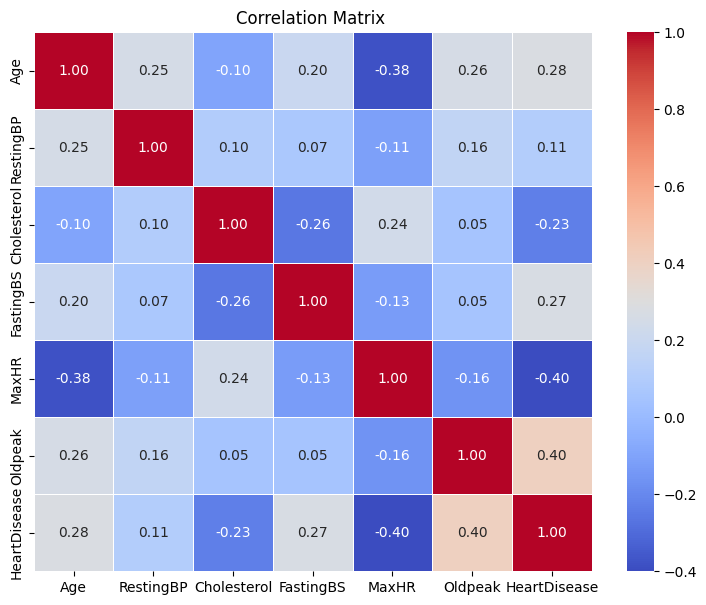

In [47]:
num_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f', 
    linewidths=0.5,
    cbar=True,
    cmap='coolwarm')
plt.title('Correlation Matrix ')
plt.show()

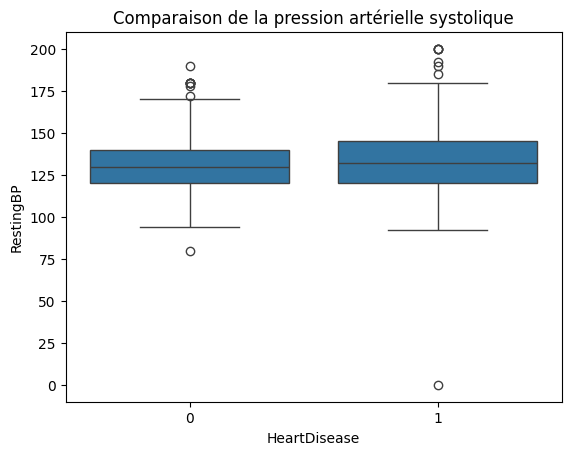

In [48]:
# Comparer la pression artérielle systolique entre les patients sains et malades
sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.title('Comparaison de la pression artérielle systolique')
plt.show()

## Data 

In [49]:
X = df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

## Data preprocessing 

In [50]:
# Scaling data
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X = sc.fit_transform(X)

In [51]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Model Training

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

results = []

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Model evaluation 

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        77
           1       0.84      0.88      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



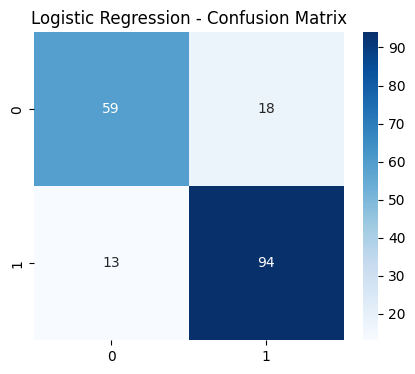

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        77
           1       0.86      0.88      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



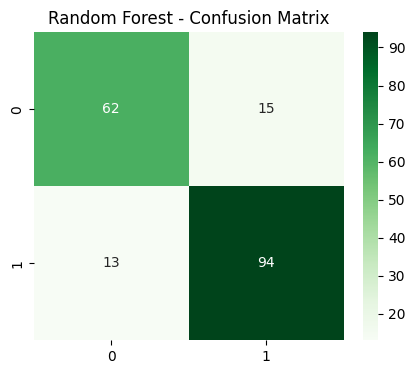

In [53]:
lr_prediction = lr_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_prediction))
results.append(accuracy_score(y_test, lr_prediction))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, lr_prediction), annot=True, cmap="Blues", fmt='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

rf_prediction = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_prediction))
results.append(accuracy_score(y_test, rf_prediction))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_prediction), annot=True, cmap="Greens", fmt='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()

### Vizualization of the prediction based on the RestingBp and Cholesterol series

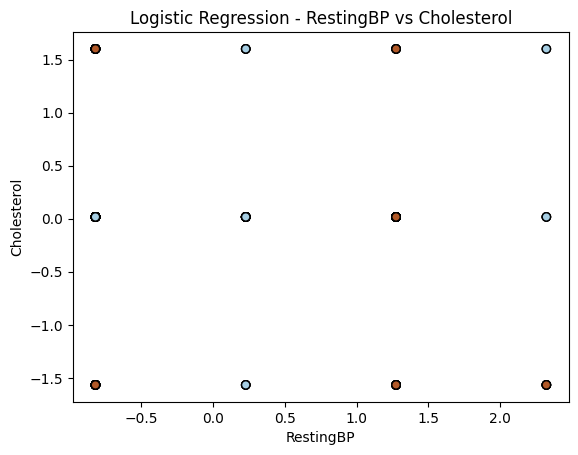

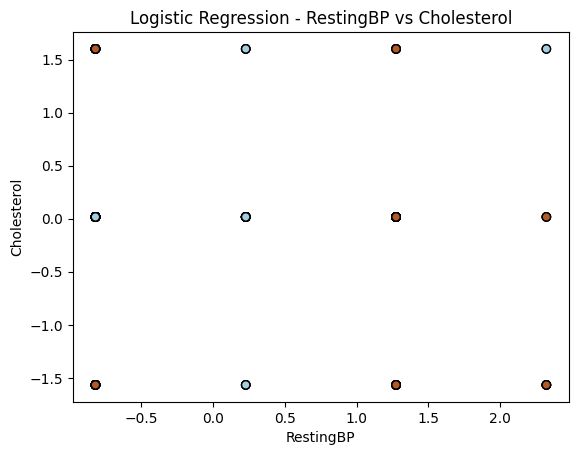

In [54]:
plt.scatter(X_test[:, 2], X_test[:, 6], c=lr_prediction, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Logistic Regression - RestingBP vs Cholesterol')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.show()



plt.scatter(X_test[:, 2], X_test[:, 6], c=rf_prediction, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Logistic Regression - RestingBP vs Cholesterol')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.show()


## Results Visualization

In [55]:
final_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": results
})
final_results.set_index("Model", inplace=True)
final_results

,Accuracy
Model,
Logistic Regression,0.831522
Random Forest,0.847826


## Conclusion

**Random Forest has a higher accuracy than LogisticRegression**